# Demonstration of Detector Plotting Utilities

I have implemented tools for making plots of tracks in the detector, which modules they are hitting, which modules a NN are predicting. The plots are either 2D projection plots onto the xy, xz, yz planes, or 3D plots. I'll demonstrate both kinds of plots below.

In [13]:
import matplotlib.pyplot as plt
import tools.plot_detector_tools
from tools.plot_detector_tools import EventPlotter
import numpy as np

Put your own file locations here.

In [2]:
detector_file = '../TrackML_data/detectors.csv'
event_file = '/data1/users/jcollins/TrackML/data/event000001000'

Choose a track id from the selected event.

In [3]:
track_ids = [4504011944230912.0]

This generates an instance of the EventPlotter class. It takes a little while to initialize, because at initialization it generates the coordinates of all the module vertices. It treats each module as a 2D polygon (ignoring thickness to reduce clutter and speed things up), and calculates the corners of the squares/rectangles. In principle this isn't needed for every kind of plot that the class generates, so could be made to be initialized separately.

In [4]:
myplotter = EventPlotter(event_file,detector_file)

### 1) 2D Projection Plots

The first kind of plot it can generate are 2D projections. This is the fastest example. It will show all the 'noise' hits as grey dots, to give an impression of the detector geometry, and overlay on top of that the tracks that you have selected.

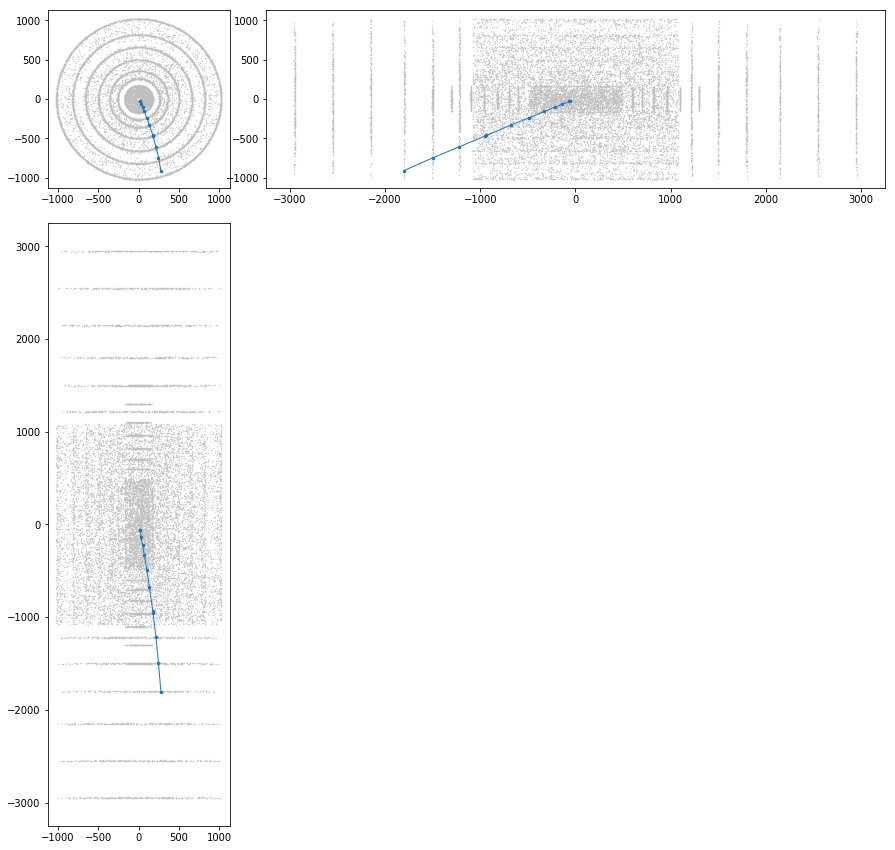

In [5]:
fig, axarr = myplotter.prepare_2D_projection_plot(track_ids, bg_style = 'noise_hits')
plt.show()

Instead, the background can be all hits in the event. This takes a little longer, but gives a finer resolution of the detector geometry.

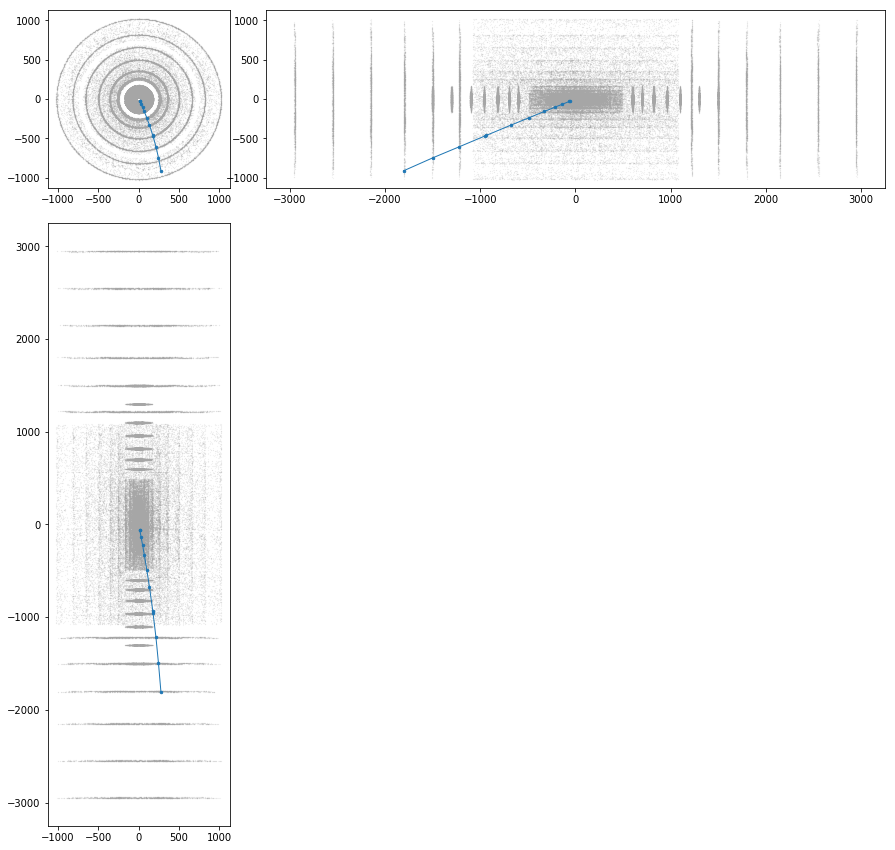

In [6]:
fig, axarr = myplotter.prepare_2D_projection_plot(track_ids, bg_style = 'all_hits')
plt.show()

We can instead use as the detector background the actual detector geometry, drawn from the events file. It takes a long time to render all detector modules (and it can get quite messy), and so I recommend only rendering a subset of detector volumes. Below we render only the innermost detector volume, volume 8.

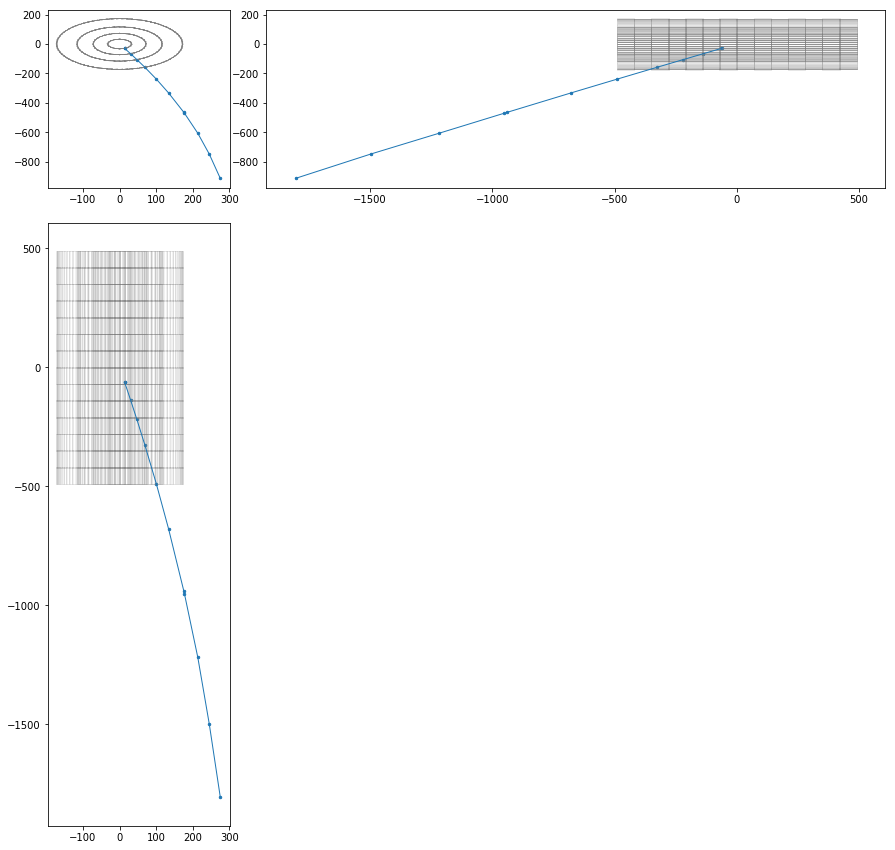

In [7]:
plt.close('all')
fig, axarr = myplotter.prepare_2D_projection_plot(track_ids, bg_style = 'module_lines', volumes = [8])
plt.show()

The axis scaling is unfortunate. We can fix that.

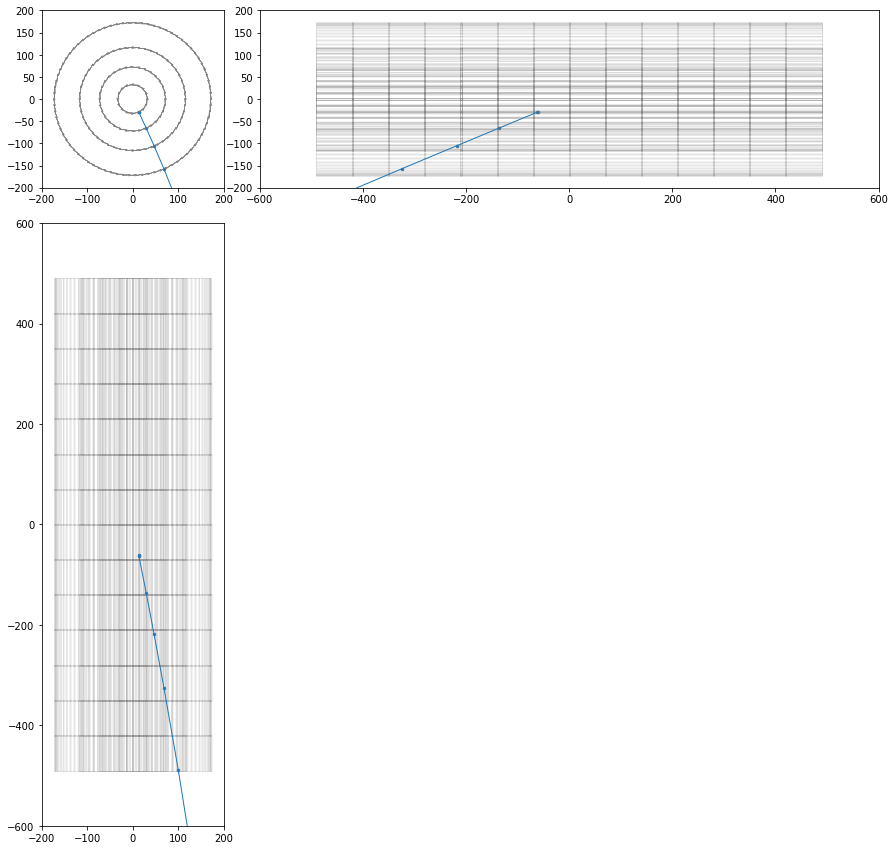

In [8]:
myplotter.set_xyzlims_2D_projection_plot(axarr, -200, 200, -200, 200, -600, 600)
fig

You can also color the detector layers to make them more distinct. Use he colormaps defined here (below I chose viridis) https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

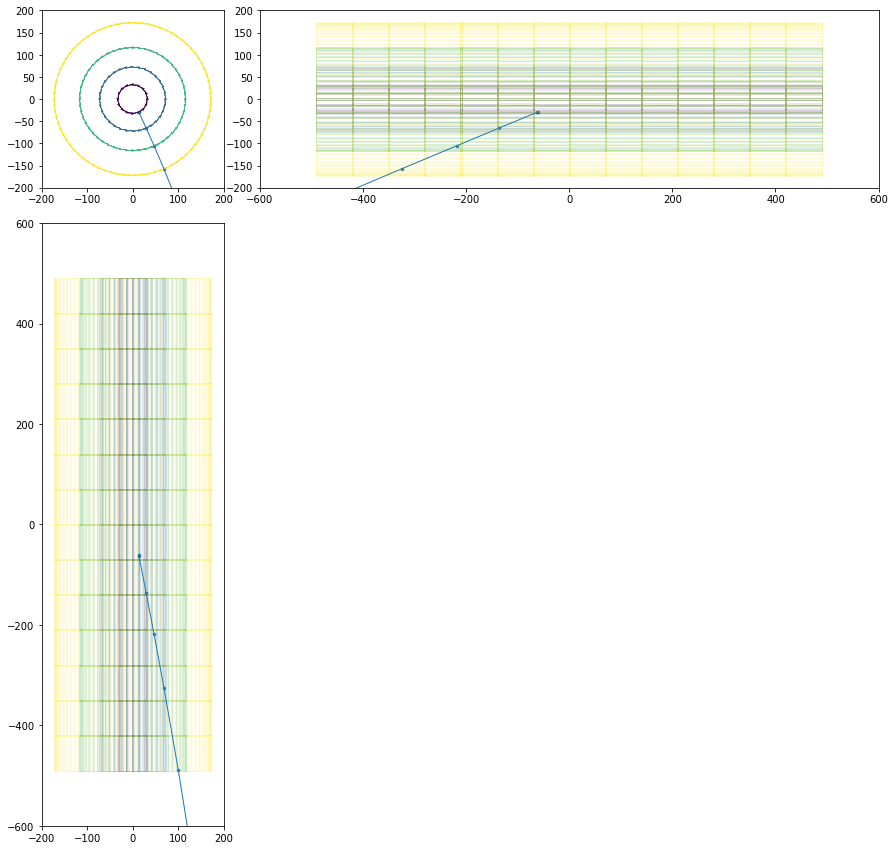

In [9]:
plt.close('all')
fig, axarr = myplotter.prepare_2D_projection_plot(track_ids, bg_style = 'module_lines', volumes = [8],
                                                 module_line_cmap = 'viridis')
myplotter.set_xyzlims_2D_projection_plot(axarr, -200, 200, -200, 200, -600, 600)
plt.show()

You can highlight with an outline the modules which the track has hit:

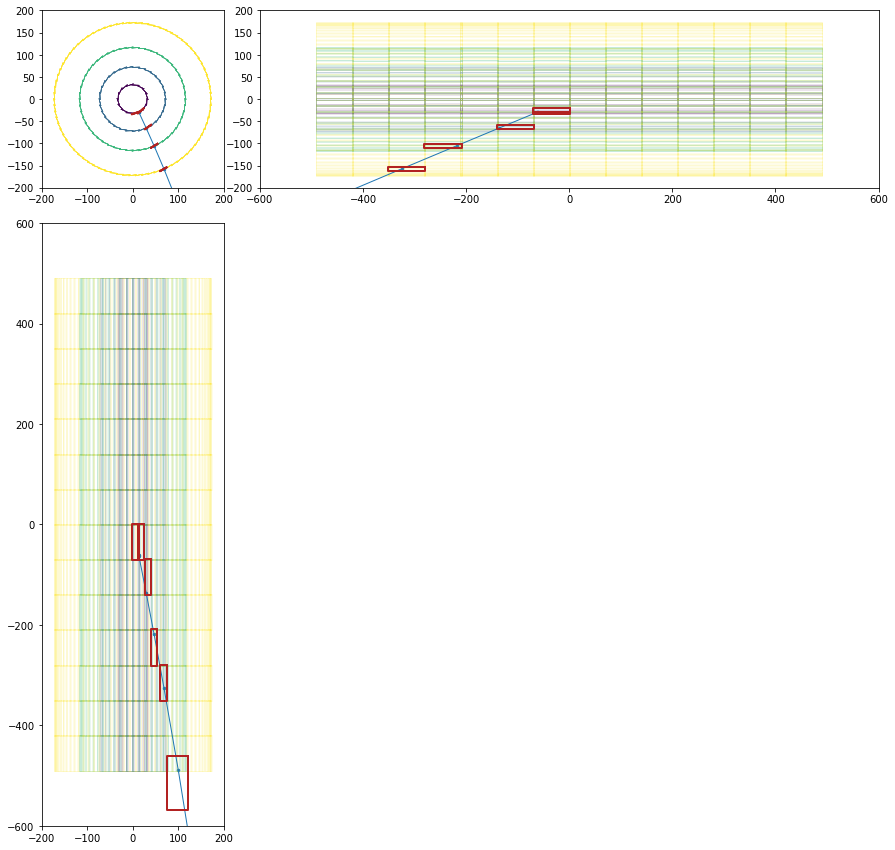

In [10]:
plt.close('all')
fig, axarr = myplotter.prepare_2D_projection_plot(track_ids, bg_style = 'module_lines', volumes = [8],
                                                 module_line_cmap = 'viridis')
myplotter.set_xyzlims_2D_projection_plot(axarr, -200, 200, -200, 200, -600, 600)
myplotter.add_module_hit_outline_2D_projection_plot(fig,track_ids[0])
plt.show()

Or only show a subset of these hits:

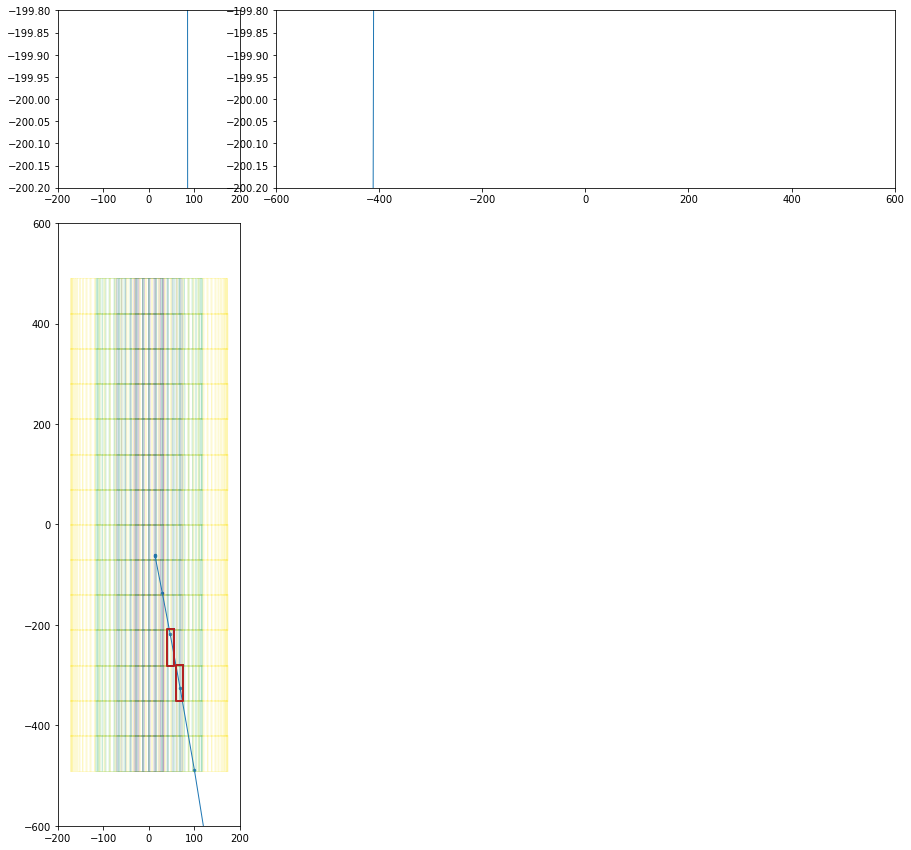

In [16]:
plt.close('all')
fig, axarr = myplotter.prepare_2D_projection_plot(track_ids, bg_style = 'module_lines', volumes = [8],
                                                 module_line_cmap = 'viridis')
myplotter.set_xyzlims_2D_projection_plot(axarr, -200, 200, -200, -200, -600, 600)
myplotter.add_module_hit_outline_2D_projection_plot(fig,track_ids[0],hitlist = [3,4])
plt.show()

You can highlight modules of interest with a shaded rectangle with a selected opacity. This will be used to highlight NN predictions, where the opacity indicates the confidence of the prediction.

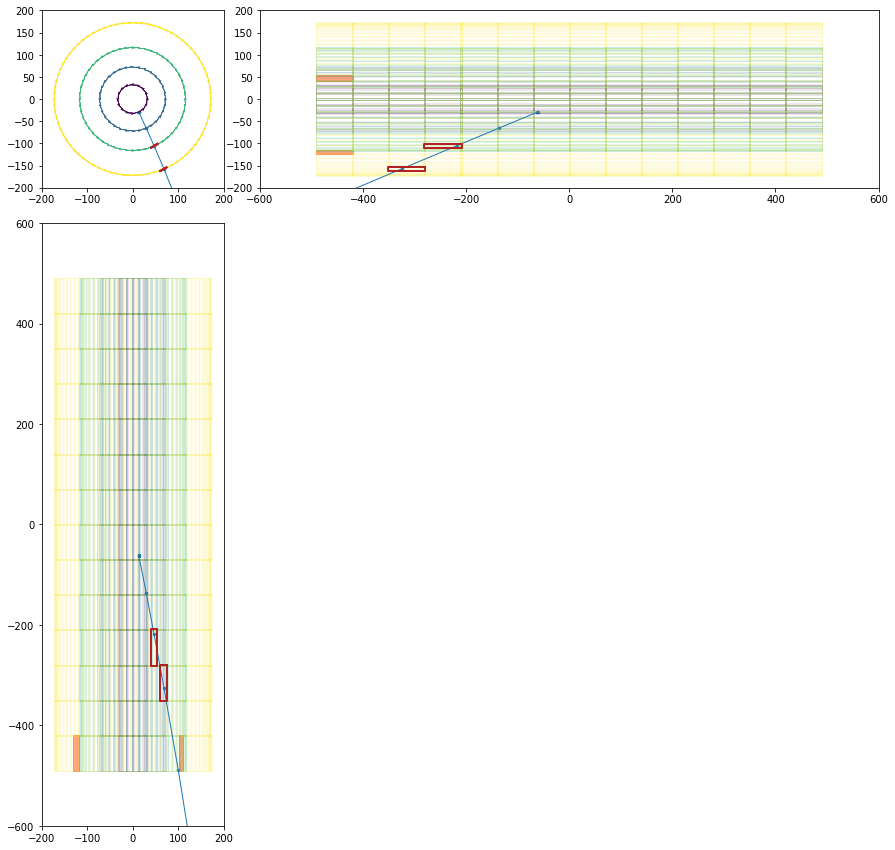

In [15]:
plt.close('all')
fig, axarr = myplotter.prepare_2D_projection_plot(track_ids, bg_style = 'module_lines', volumes = [8],
                                                 module_line_cmap = 'viridis')
myplotter.set_xyzlims_2D_projection_plot(axarr, -200, 200, -200, 200, -600, 600)
myplotter.add_module_hit_outline_2D_projection_plot(fig,track_ids[0],hitlist = [3,4])
myplotter.add_module_hit_predictions_2D_projection_plot(fig,np.array([[8.,6.,30.],[8.,8.,10.]]),[0.5,0.5])
plt.show()

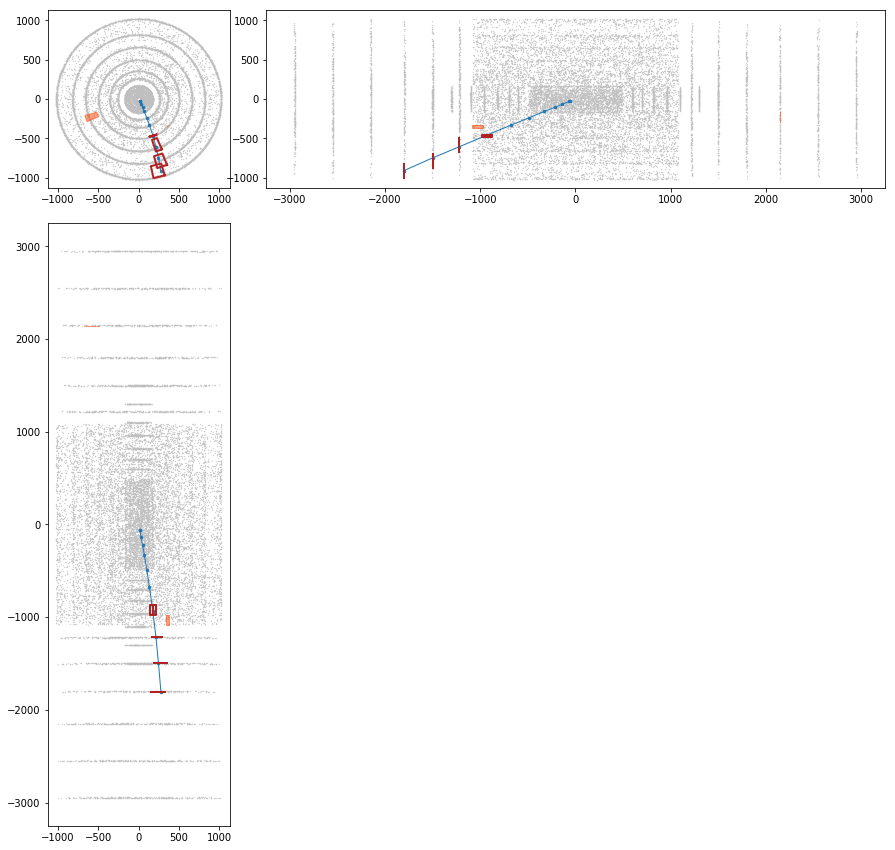

In [24]:
plt.close('all')
fig, axarr = myplotter.prepare_2D_projection_plot(track_ids, bg_style = 'noise_hits')
myplotter.add_module_hit_outline_2D_projection_plot(fig,track_ids[0],hitlist = [7,8,9,10,11])
myplotter.add_module_hit_predictions_2D_projection_plot(fig,np.array([[13.,6.,30.],[14.,8.,10.]]),[0.5,0.5])
plt.show()

I would like to implement functionality to rotate about the z axis. This would require some movements around in the code so I haven't implemented it currently.

### 1) 3D Plots

The second kind of plot it can generate are 3D plots. Here we plot the first five hits in the track, and we show the inner detector modules. We also highlight with an outline the module of the fourth hit, and also a random module with orange shading.

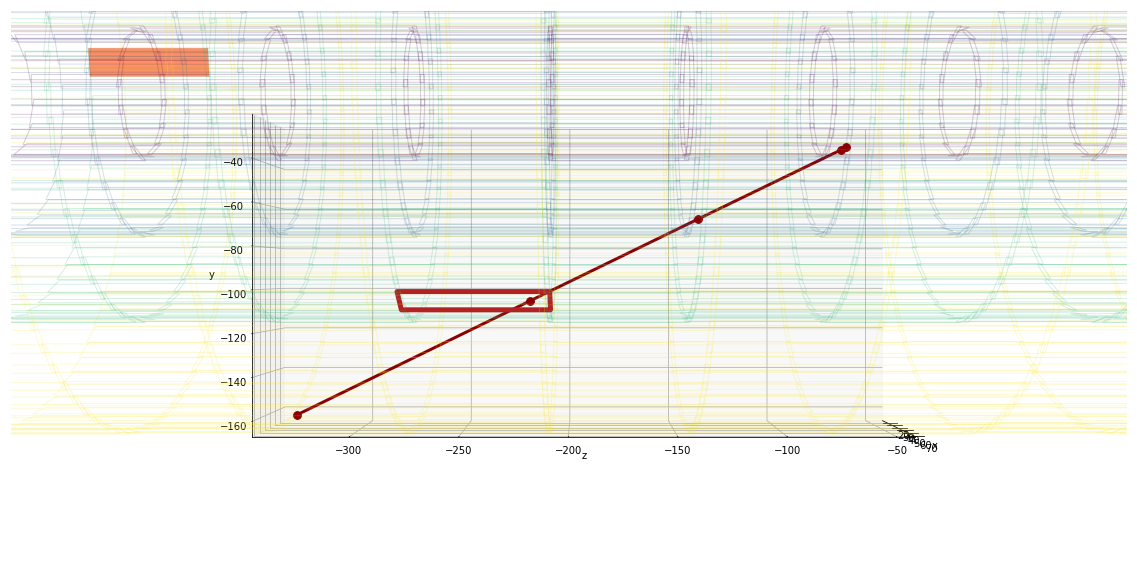

In [25]:
fig, axes = myplotter.prepare_3D_plot(track_ids[0],volumes = [8],hits = np.arange(0,5))
myplotter.add_module_hit_outline_3D_plot(fig, track_ids[0], hitlist = [3])
myplotter.add_module_hit_predictions_3D_plot(fig, np.array([[8,6,50]]), [0.6])
plt.show()

We can rotate the plot in the following way

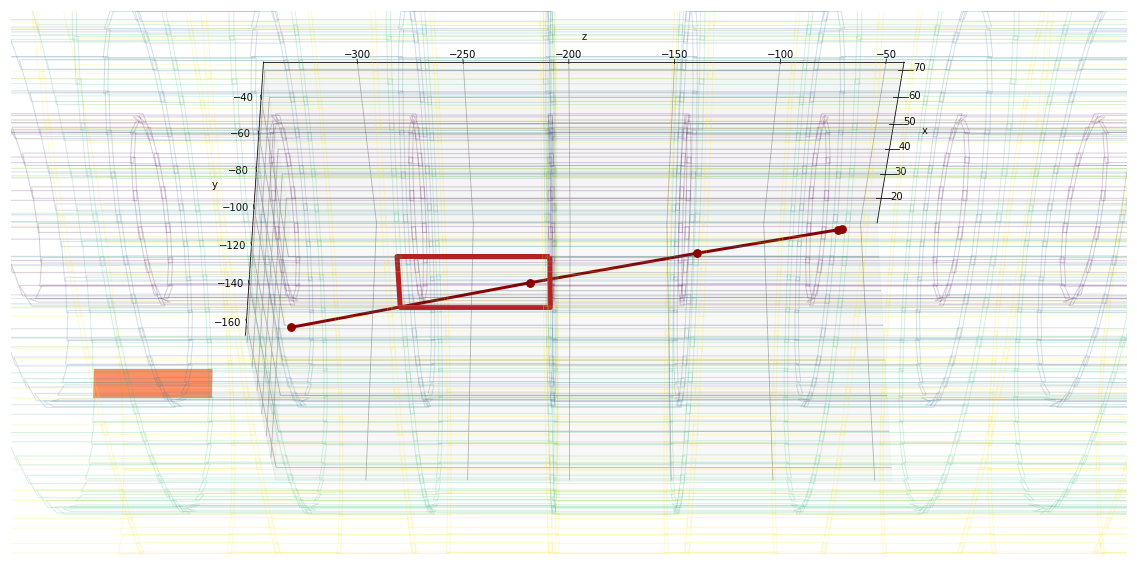

In [28]:
fig, ax = myplotter.prepare_3D_plot(track_ids[0],volumes = [8],hits = np.arange(0,5))
myplotter.add_module_hit_outline_3D_plot(fig, track_ids[0], hitlist = [3])
myplotter.add_module_hit_predictions_3D_plot(fig, np.array([[8,6,50]]), [0.6])
ax.view_init(-30, 0)
plt.show()

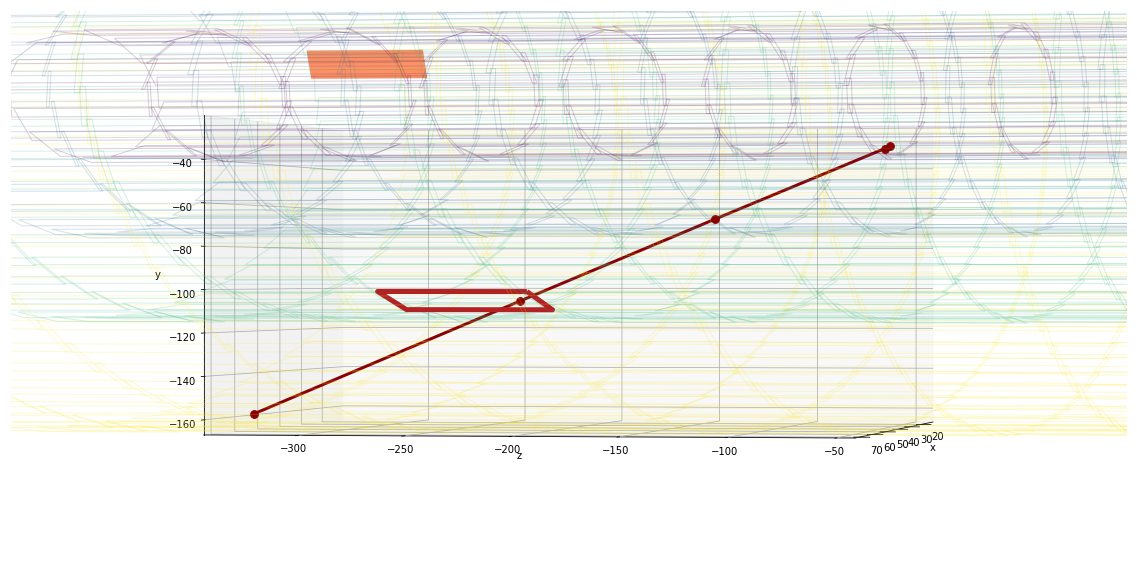

In [33]:
fig, ax = myplotter.prepare_3D_plot(track_ids[0],volumes = [8],hits = np.arange(0,5))
myplotter.add_module_hit_outline_3D_plot(fig, track_ids[0], hitlist = [3])
myplotter.add_module_hit_predictions_3D_plot(fig, np.array([[8,6,50]]), [0.6])
ax.view_init(0,10)
plt.show()